# Utilização de algoritmos de inteligência artificial na previsão de resultados de partidas de futebol

Estudo e comparação do desempenho de diferentes algoritmos de inteligência artificial

TCC do curso de Ciência da Computação do Instituto Federal do Triângulo Mineiro - Campus Ituiutaba

Autor: Olesio Gardenghi Neto

## Pré-processamento dos dados

In [115]:
# Import das bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
# Mudando o estilo de plot dos gráficos
plt.style.use('seaborn')
# Comando para mostrar os gráficos dentro do Jupyter
%matplotlib inline

In [116]:
# Lendo a base de dados e transformando em dataframe
df = pd.read_csv("data/Brasileirao2012.csv")

In [117]:
df.head()

,athlete_id,athlete_name,round,team_id,team_name,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,...,sucessfulPassesPercent,timePlayed,switchField,backPasses,nickname,substitute,substituted,win,draw,defeat
0,0.0,NaN,1,5.0,Botafogo,3.0,253.0,5.0,23.0,0.0,...,83.7,990.0,1.0,4.0,NaN,0.0,0.0,1,0,0
1,0.0,NaN,1,24.0,São Paulo,5.0,193.0,2.0,34.0,2.0,...,79.1,990.0,1.0,4.0,NaN,0.0,0.0,0,0,1
2,0.0,NaN,1,25.0,Vasco,2.0,205.0,1.0,33.0,1.0,...,82.1,990.0,5.0,6.0,NaN,0.0,0.0,1,0,0
3,0.0,NaN,1,13.0,Grêmio,6.0,291.0,4.0,32.0,2.0,...,81.2,990.0,3.0,8.0,NaN,0.0,0.0,0,0,1
4,0.0,NaN,1,17.0,Palmeiras,0.0,296.0,2.0,45.0,1.0,...,84.2,990.0,1.0,2.0,NaN,0.0,0.0,0,1,0


In [118]:
df.columns

Index(['athlete_id', 'athlete_name', 'round', 'team_id', 'team_name',
       'assistances', 'receivedBalls', 'recoveredBalls', 'lostBalls',
       'yellowCards', 'redCards', 'cards', 'crossBalls', 'receivedCrossBalls',
       'missedCrossBalls', 'receivedCrossBallsPercent', 'defenses',
       'sucessfulTackles', 'unsucessfulTackles', 'tackles', 'sucessfulDribles',
       'unsucessfulDribles', 'dribles', 'givenCorners', 'receivedCorners',
       'receivedFouls', 'committedFouls', 'goodFinishes', 'postFinishes',
       'badFinishes', 'finishes', 'goals', 'ownGoals', 'offsides',
       'longPasses', 'sucessfulLongPasses', 'unsucessfulLongPasses',
       'sucessfulPasses', 'unsucessfulPasses', 'passes',
       'sucessfulPassesPercent', 'timePlayed', 'switchField', 'backPasses',
       'nickname', 'substitute', 'substituted', 'win', 'draw', 'defeat'],
      dtype='object')

In [119]:
df.describe()

,athlete_id,athlete_name,round,team_id,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,...,sucessfulPassesPercent,timePlayed,switchField,backPasses,nickname,substitute,substituted,win,draw,defeat
count,756.0,0.0,760.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,0.0,756.0,756.0,760.000000,760.000000,760.000000
mean,0.0,NaN,19.500000,76.781746,3.369048,226.791005,3.056878,32.878307,2.337302,0.145503,...,80.196296,984.927279,2.146825,3.279101,NaN,0.0,0.0,0.359211,0.281579,0.359211
std,0.0,NaN,10.973078,235.210186,2.196335,63.948520,1.902440,8.524744,1.391073,0.367549,...,5.581413,38.360813,1.997582,2.373728,NaN,0.0,0.0,0.480085,0.450065,0.480085
min,0.0,NaN,1.000000,1.000000,0.000000,88.000000,0.000000,6.000000,0.000000,0.000000,...,56.700000,1.023000,0.000000,0.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000
25%,0.0,NaN,10.000000,8.500000,2.000000,179.000000,2.000000,27.000000,1.000000,0.000000,...,76.800000,990.000000,1.000000,1.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000
50%,0.0,NaN,19.500000,17.000000,3.000000,219.000000,3.000000,33.000000,2.000000,0.000000,...,80.800000,990.000000,2.000000,3.000000,NaN,0.0,0.0,0.000000,0.000000,0.000000
75%,0.0,NaN,29.000000,30.000000,5.000000,271.250000,4.000000,38.000000,3.000000,0.000000,...,84.200000,990.000000,3.000000,5.000000,NaN,0.0,0.0,1.000000,1.000000,1.000000
max,0.0,NaN,38.000000,1094.000000,13.000000,473.000000,11.000000,63.000000,8.000000,2.000000,...,93.200000,996.000000,11.000000,14.000000,NaN,0.0,0.0,1.000000,1.000000,1.000000


In [120]:
# Selecionando apenas as características que nos interessa
df = df[['assistances', 'receivedBalls', 'recoveredBalls', 'lostBalls', 'yellowCards', 'redCards', 'receivedCrossBalls', 'missedCrossBalls', 'receivedCrossBallsPercent', 'defenses', 'sucessfulTackles', 'sucessfulDribles',
       'unsucessfulDribles', 'givenCorners', 'receivedCorners',
       'receivedFouls', 'committedFouls', 'goodFinishes','badFinishes', 'finishes', 'goals', 'ownGoals', 'offsides','sucessfulLongPasses', 'unsucessfulLongPasses',
       'sucessfulPasses', 'unsucessfulPasses', 'win', 'draw', 'defeat']]

In [121]:
df.head()

,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,receivedCrossBallsPercent,defenses,...,goals,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses,win,draw,defeat
0,3.0,253.0,5.0,23.0,0.0,0.0,7.0,23.0,23.3,3.0,...,4.0,0.0,1.0,0.0,0.0,242.0,47.0,1,0,0
1,5.0,193.0,2.0,34.0,2.0,0.0,5.0,4.0,55.6,4.0,...,2.0,0.0,2.0,0.0,1.0,185.0,49.0,0,0,1
2,2.0,205.0,1.0,33.0,1.0,0.0,3.0,20.0,13.0,3.0,...,2.0,0.0,1.0,1.0,0.0,197.0,43.0,1,0,0
3,6.0,291.0,4.0,32.0,2.0,0.0,5.0,17.0,22.7,2.0,...,1.0,0.0,5.0,0.0,1.0,281.0,65.0,0,0,1
4,0.0,296.0,2.0,45.0,1.0,0.0,7.0,10.0,41.2,5.0,...,1.0,0.0,0.0,0.0,2.0,287.0,54.0,0,1,0


In [122]:
# Junção das 3 colunas de resultados em uma só
def convert_output(source):
    target = source.copy() #make a copy from source
    target['new'] = 2 #create a new column and initialize it with a random value
    for i, rows in target.iterrows():
        if rows['win'] == 1:
            rows['new'] = 2
        if rows['draw'] == 1:
            rows['new'] = 1
        if rows['defeat'] == 1:
            rows['new'] = 0
    return target.iloc[:, -1]  # return all rows, and only the last column

df['FTR'] = convert_output(df[['win','draw','defeat']])

In [123]:
df.drop(['win','draw','defeat'],axis=1, inplace=True)

In [124]:
df.head()

,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,receivedCrossBallsPercent,defenses,...,badFinishes,finishes,goals,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses,FTR
0,3.0,253.0,5.0,23.0,0.0,0.0,7.0,23.0,23.3,3.0,...,10.0,18.0,4.0,0.0,1.0,0.0,0.0,242.0,47.0,2
1,5.0,193.0,2.0,34.0,2.0,0.0,5.0,4.0,55.6,4.0,...,11.0,16.0,2.0,0.0,2.0,0.0,1.0,185.0,49.0,0
2,2.0,205.0,1.0,33.0,1.0,0.0,3.0,20.0,13.0,3.0,...,9.0,13.0,2.0,0.0,1.0,1.0,0.0,197.0,43.0,2
3,6.0,291.0,4.0,32.0,2.0,0.0,5.0,17.0,22.7,2.0,...,11.0,15.0,1.0,0.0,5.0,0.0,1.0,281.0,65.0,0
4,0.0,296.0,2.0,45.0,1.0,0.0,7.0,10.0,41.2,5.0,...,10.0,22.0,1.0,0.0,0.0,0.0,2.0,287.0,54.0,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 28 columns):
assistances                  756 non-null float64
receivedBalls                756 non-null float64
recoveredBalls               756 non-null float64
lostBalls                    756 non-null float64
yellowCards                  756 non-null float64
redCards                     756 non-null float64
receivedCrossBalls           756 non-null float64
missedCrossBalls             756 non-null float64
receivedCrossBallsPercent    756 non-null float64
defenses                     756 non-null float64
sucessfulTackles             756 non-null float64
sucessfulDribles             756 non-null float64
unsucessfulDribles           756 non-null float64
givenCorners                 756 non-null float64
receivedCorners              756 non-null float64
receivedFouls                756 non-null float64
committedFouls               756 non-null float64
goodFinishes                 756 non-null flo

In [126]:
df.isnull().sum()

assistances                  4
receivedBalls                4
recoveredBalls               4
lostBalls                    4
yellowCards                  4
redCards                     4
receivedCrossBalls           4
missedCrossBalls             4
receivedCrossBallsPercent    4
defenses                     4
sucessfulTackles             4
sucessfulDribles             4
unsucessfulDribles           4
givenCorners                 4
receivedCorners              4
receivedFouls                4
committedFouls               4
goodFinishes                 4
badFinishes                  4
finishes                     4
goals                        4
ownGoals                     4
offsides                     4
sucessfulLongPasses          4
unsucessfulLongPasses        4
sucessfulPasses              4
unsucessfulPasses            4
FTR                          0
dtype: int64

In [127]:
df.dropna(inplace=True)
df.head()

,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,receivedCrossBallsPercent,defenses,...,badFinishes,finishes,goals,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses,FTR
0,3.0,253.0,5.0,23.0,0.0,0.0,7.0,23.0,23.3,3.0,...,10.0,18.0,4.0,0.0,1.0,0.0,0.0,242.0,47.0,2
1,5.0,193.0,2.0,34.0,2.0,0.0,5.0,4.0,55.6,4.0,...,11.0,16.0,2.0,0.0,2.0,0.0,1.0,185.0,49.0,0
2,2.0,205.0,1.0,33.0,1.0,0.0,3.0,20.0,13.0,3.0,...,9.0,13.0,2.0,0.0,1.0,1.0,0.0,197.0,43.0,2
3,6.0,291.0,4.0,32.0,2.0,0.0,5.0,17.0,22.7,2.0,...,11.0,15.0,1.0,0.0,5.0,0.0,1.0,281.0,65.0,0
4,0.0,296.0,2.0,45.0,1.0,0.0,7.0,10.0,41.2,5.0,...,10.0,22.0,1.0,0.0,0.0,0.0,2.0,287.0,54.0,1


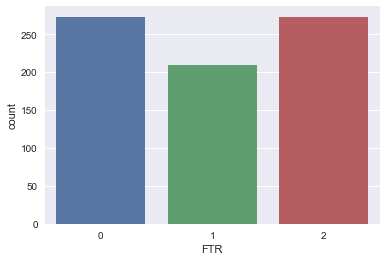

In [128]:
# 0 - Derrota, 1 - Empate, 2 - Vitória
sns.countplot(x='FTR', data=df)

In [129]:
# Normalizando os dados com o StandardScaler
# A distribuição dos dados será transformada tal que sua média = 0 e o desvio padrão = 1
# z = (x-u)/σ
# x = dados, u = média, σ = desvio padrão
scaler = StandardScaler()
scaler.fit(df.drop(['FTR'],axis=1))
dados_normalizados = scaler.transform(df.drop(['FTR'],axis=1))
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[:-1])
df = df[['FTR']]
df = pd.concat([df, df_normalizado], axis=1, sort=False)
df.dropna(inplace=True)
df.head()

,FTR,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,receivedCrossBallsPercent,...,goodFinishes,badFinishes,finishes,goals,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses
0,2.0,-0.168140,0.410117,1.022060,-1.159548,-1.681327,-0.396135,0.727197,1.028067,0.069262,...,1.460464,0.751466,1.233189,2.498598,0.0,-0.718523,-0.888714,-0.920240,0.380777,-0.387335
1,0.0,0.743071,-0.528759,-0.555906,0.131668,-0.242636,-0.396135,0.064435,-1.829355,3.043242,...,0.180088,1.042655,0.802171,0.690135,0.0,-0.177484,-0.888714,-0.304030,-0.541305,-0.194178
2,2.0,-0.623745,-0.340984,-1.081895,0.014285,-0.961982,-0.396135,-0.598326,0.576895,-0.879097,...,-0.246704,0.460278,0.155645,0.690135,0.0,-0.718523,-0.132957,-0.920240,-0.347182,-0.773648
3,0.0,1.198676,1.004738,0.496071,-0.103099,-0.242636,-0.396135,0.064435,0.125723,0.014018,...,-0.246704,1.042655,0.586663,-0.214097,0.0,1.445633,-0.888714,-0.304030,1.011675,1.351073
4,1.0,-1.534956,1.082978,-0.555906,1.422884,-0.961982,-0.396135,0.727197,-0.927011,1.717381,...,2.740839,0.751466,2.095224,-0.214097,0.0,-1.259561,-0.888714,0.312181,1.108736,0.288713


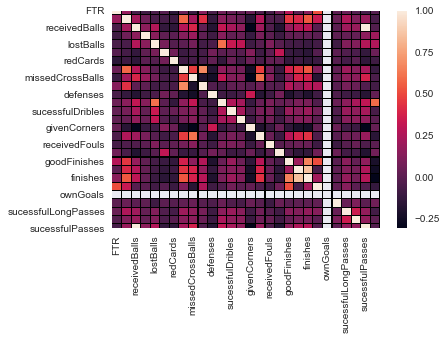

In [130]:
#Mapa de calor de correlações
sns.heatmap(df.corr(),linewidths=0.1,linecolor="black")

## Aplicando os algoritmos de IA

In [131]:
# Características
X = df.drop('FTR',axis=1)
# Alvo da previsão
y = df['FTR']

In [132]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [133]:
df_y_test = y_test.reset_index()
df_y_test.drop('index',axis=1, inplace=True)

### Regressão Linear

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
predict_linear_regression = linear_regression.predict(X_test)

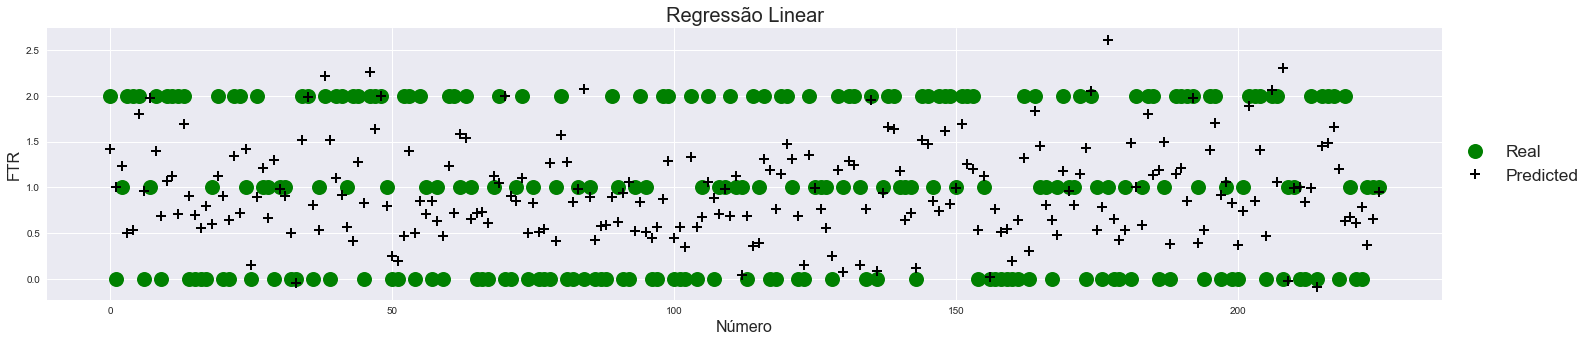

In [136]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_linear_regression, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Regressão Linear',fontsize=20)
plt.show()

In [137]:
print('Score Regressão Linear: %.2f' %linear_regression.score(X_test, y_test))

Score Regressão Linear: 0.21


### Regressão Logística

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
predict_logistic_regression = logistic_regression.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [140]:
print(classification_report(y_test,predict_logistic_regression))
print(confusion_matrix(y_test,predict_logistic_regression))
print('\nScore Regressão Log: %.2f' %logistic_regression.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.50      0.76      0.60        82
         1.0       0.44      0.11      0.18        62
         2.0       0.67      0.70      0.68        82

    accuracy                           0.56       226
   macro avg       0.53      0.52      0.49       226
weighted avg       0.54      0.56      0.51       226

[[62  5 15]
 [42  7 13]
 [21  4 57]]

Score Regressão Log: 0.56


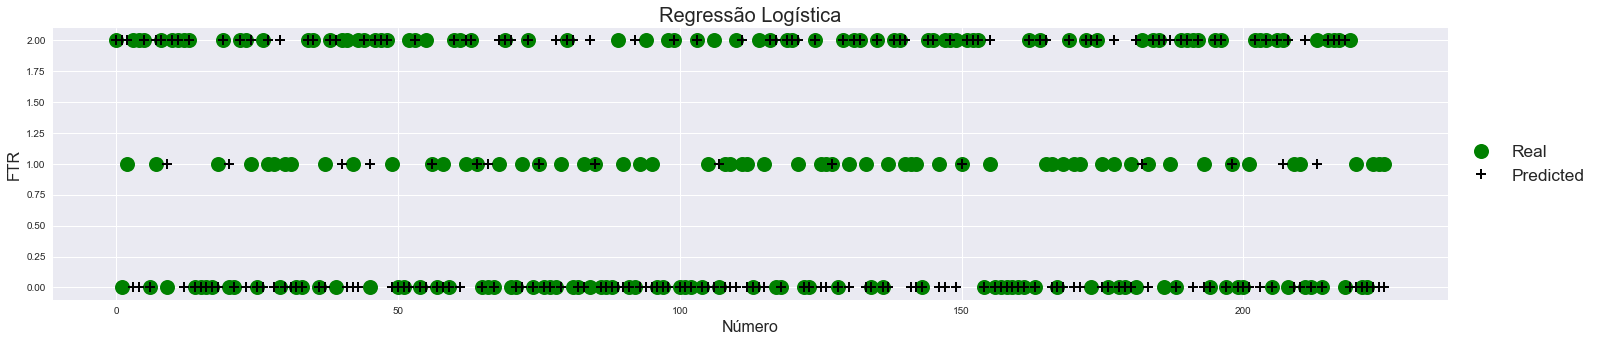

In [141]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_logistic_regression, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Regressão Logística',fontsize=20)
plt.show()

### Árvore de Decisão

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision_tree = decision_tree.predict(X_test)

In [144]:
print(classification_report(y_test,predict_decision_tree))
print(confusion_matrix(y_test,predict_decision_tree))
print('\nScore Árvore de Decisão: %.2f' %decision_tree.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.55      0.44      0.49        82
         1.0       0.39      0.47      0.42        62
         2.0       0.64      0.66      0.65        82

    accuracy                           0.53       226
   macro avg       0.52      0.52      0.52       226
weighted avg       0.53      0.53      0.53       226

[[36 30 16]
 [18 29 15]
 [12 16 54]]

Score Árvore de Decisão: 0.53


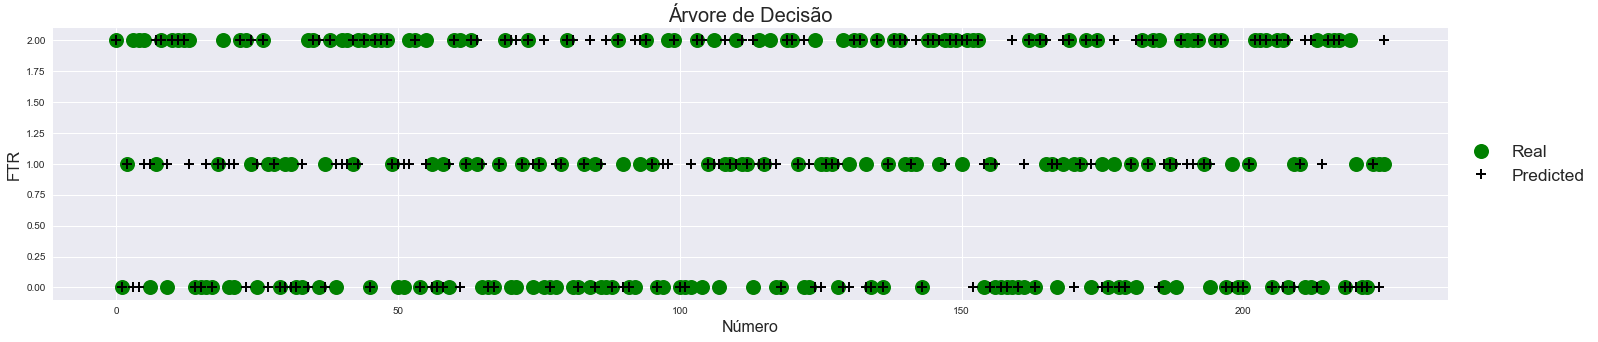

In [145]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_decision_tree, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Árvore de Decisão',fontsize=20)
plt.show()

### Floresta Aleatória

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
#Método do cotovelo
error_rate = []

for i in range(1,200):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    predict_random_forest = random_forest.predict(X_test)
    error_rate.append(np.mean(predict_random_forest!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Number estimativas')

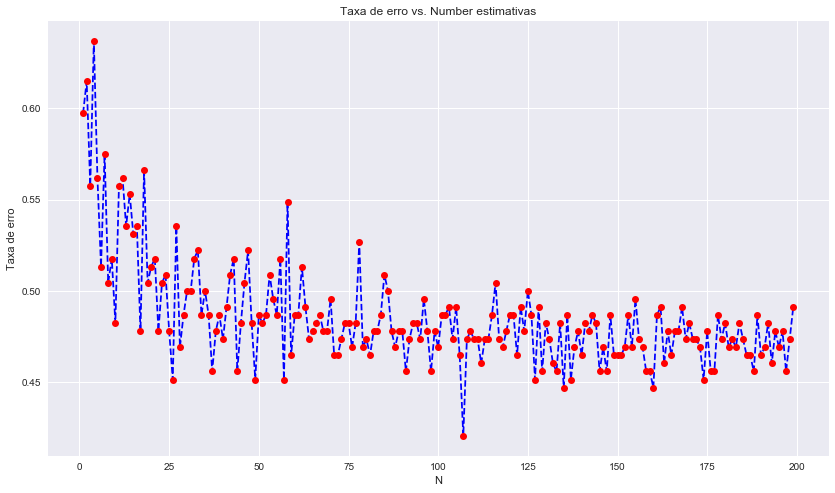

In [148]:
plt.figure(figsize=(14,8))
plt.plot(range(1,200),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Number estimativas")

In [149]:
random_forest = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest.fit(X_train, y_train)
predict_random_forest = random_forest.predict(X_test)

In [150]:
print(classification_report(y_test,predict_random_forest))
print(confusion_matrix(y_test,predict_random_forest))
print('\nScore Floresta Aleatória: %.2f' %random_forest.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.50      0.71      0.58        82
         1.0       0.26      0.10      0.14        62
         2.0       0.65      0.68      0.67        82

    accuracy                           0.53       226
   macro avg       0.47      0.50      0.46       226
weighted avg       0.49      0.53      0.49       226

[[58 10 14]
 [40  6 16]
 [19  7 56]]

Score Floresta Aleatória: 0.53


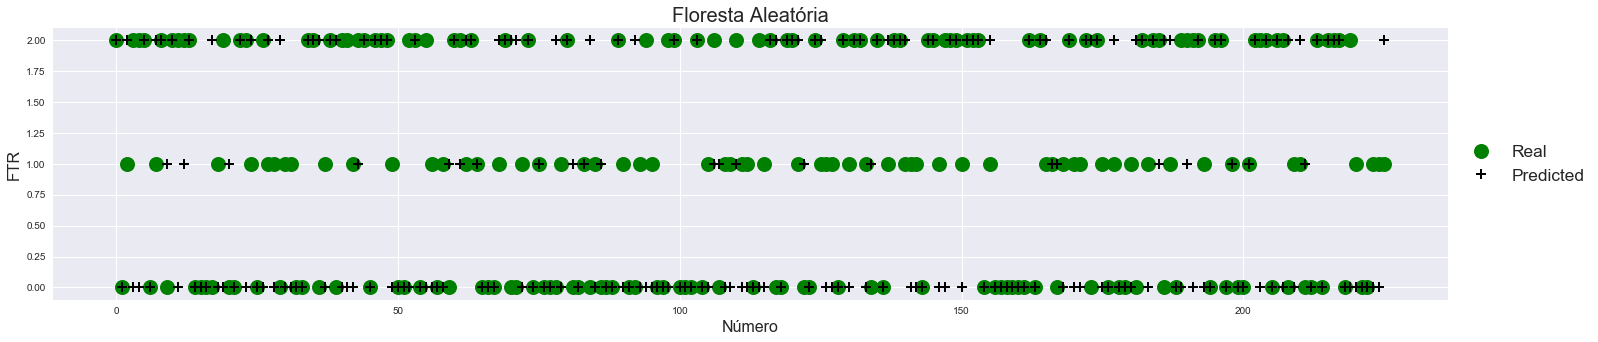

In [151]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_random_forest, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('Floresta Aleatória',fontsize=20)
plt.show()

### K Nearest Neighbours (KNN)

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predict_knn = knn.predict(X_test)
    error_rate.append(np.mean(predict_knn!=y_test))

Text(0.5, 1.0, 'Taxa de erro vs. Number estimativas')

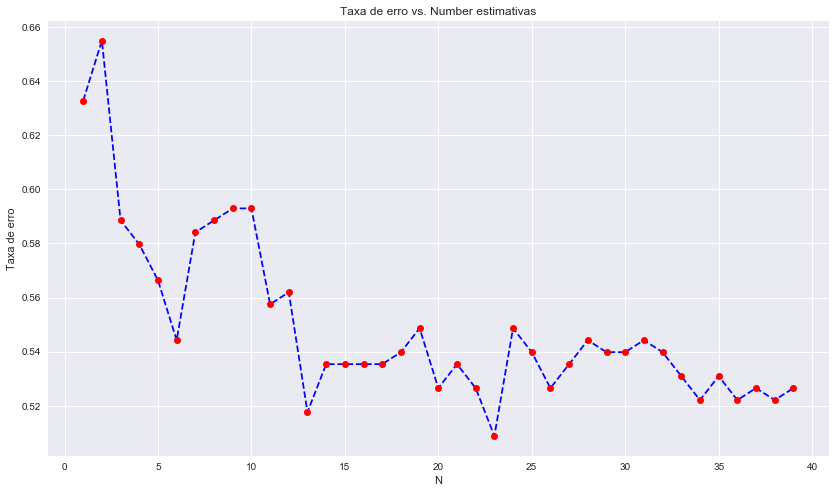

In [154]:
plt.figure(figsize=(14,8))
plt.plot(range(1,40),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red')
plt.xlabel('N')
plt.ylabel("Taxa de erro")
plt.title("Taxa de erro vs. Number estimativas")

In [155]:
knn = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)

In [156]:
print(classification_report(y_test,predict_knn))
print(confusion_matrix(y_test,predict_knn))
print('\nScore KNN: %.2f' %knn.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.48      0.51      0.50        82
         1.0       0.32      0.32      0.32        62
         2.0       0.58      0.55      0.57        82

    accuracy                           0.47       226
   macro avg       0.46      0.46      0.46       226
weighted avg       0.48      0.47      0.47       226

[[42 24 16]
 [26 20 16]
 [19 18 45]]

Score KNN: 0.47


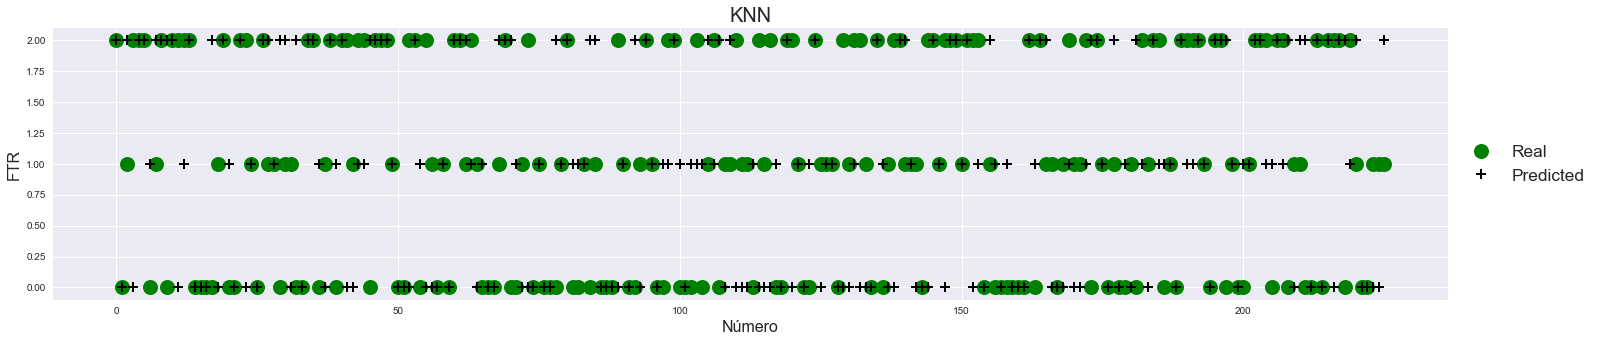

In [157]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_knn, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('KNN',fontsize=20)
plt.show()

### Support-vector Machine (SVM)

In [158]:
from sklearn.svm import SVC

In [159]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
predict_svm = grid.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.375, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.371, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.343, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.506, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.554, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.514, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.1s finished


In [160]:
print(classification_report(y_test,predict_svm))
print(confusion_matrix(y_test,predict_svm))
print('\nScore SVM: %.2f' %grid.score(X_test, y_test))

              precision    recall  f1-score   support

         0.0       0.52      0.77      0.62        82
         1.0       0.32      0.11      0.17        62
         2.0       0.59      0.59      0.59        82

    accuracy                           0.52       226
   macro avg       0.47      0.49      0.46       226
weighted avg       0.49      0.52      0.48       226

[[63  3 16]
 [37  7 18]
 [22 12 48]]

Score SVM: 0.52


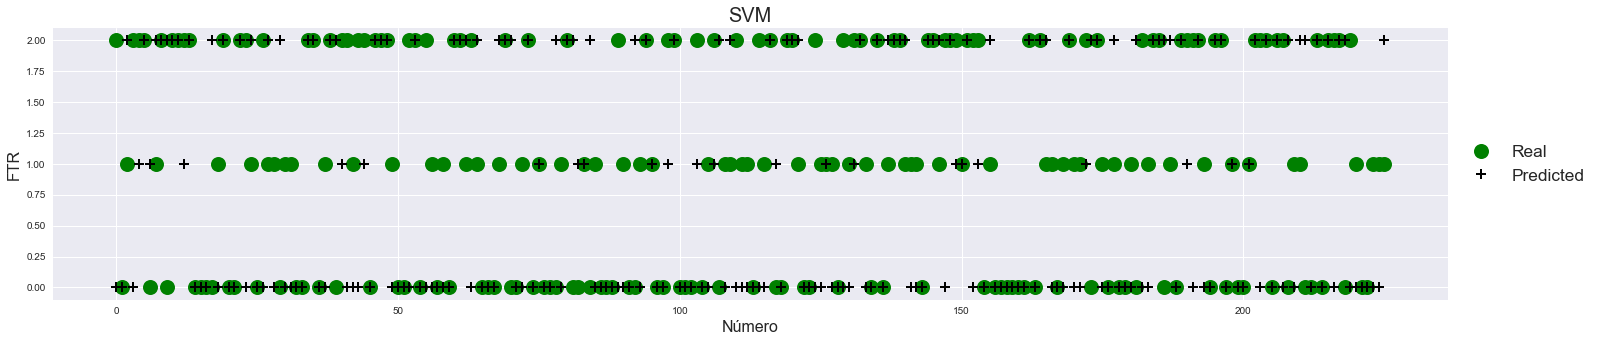

In [161]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_svm, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('SVM',fontsize=20)
plt.show()

### Multi-layer Perceptron Classifier

In [162]:
from sklearn.neural_network import MLPClassifier

In [163]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier.fit(X_train,y_train)
predict_mlp_classifier = mlp_classifier.predict(X_test)

In [164]:
#print(classification_report(y_test,predict_mlp))
print(confusion_matrix(y_test,predict_mlp_classifier))
print('\nScore MLP: %.2f' %mlp_classifier.score(X_test, y_test))

[[68  0 14]
 [45  0 17]
 [27  0 55]]

Score MLP: 0.54


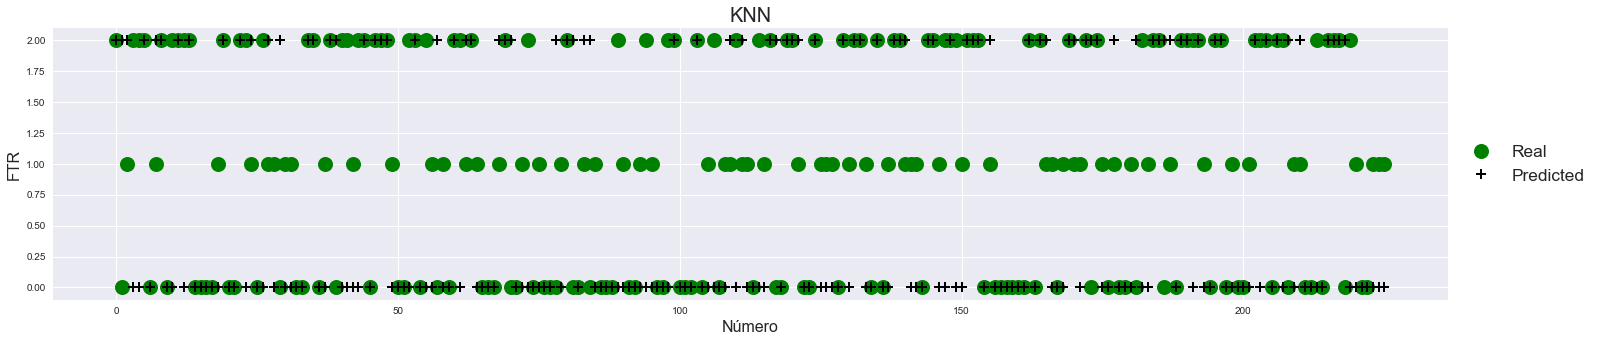

In [165]:
plt.figure(figsize=(25, 5))
plt.plot(df_y_test, 'go', ms=15, label='Real')
plt.plot(predict_mlp_classifier, '+', color='black', ms=10, markeredgewidth=2, label='Predicted')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'xx-large')
plt.ylabel('FTR',fontsize=16)
plt.xlabel('Número',fontsize=16)
plt.title('KNN',fontsize=20)
plt.show()

## Resultados finais

In [166]:
print('Regressão linear: %.2f' %(linear_regression.score(X_test, y_test)*100) + "%") 
print('\nRegressão logística: %.2f' %(logistic_regression.score(X_test, y_test)*100) + "%")
print('\nÁrvore de decisão: %.2f' %(decision_tree.score(X_test, y_test)*100) + "%")
print('\nFloresta aleatória: %.2f' %(random_forest.score(X_test, y_test)*100) + "%")
print('\nKNN: %.2f' %(knn.score(X_test, y_test)*100) + "%")
print('\nSVM: %.2f' %(grid.score(X_test, y_test)*100) + "%")

Regressão linear: 21.05%

Regressão logística: 55.75%

Árvore de decisão: 52.65%

Floresta aleatória: 53.10%

KNN: 47.35%

SVM: 52.21%


## Outra abordagem

In [167]:
df = pd.read_csv("data/Brasileirao2012.csv")

# Selecionando apenas as características que nos interessa
df = df[['assistances', 'receivedBalls', 'recoveredBalls', 'lostBalls', 'yellowCards', 'redCards', 'receivedCrossBalls', 'missedCrossBalls', 'receivedCrossBallsPercent', 'defenses', 'sucessfulTackles', 'sucessfulDribles',
       'unsucessfulDribles', 'givenCorners', 'receivedCorners',
       'receivedFouls', 'committedFouls', 'goodFinishes','badFinishes', 'finishes', 'goals', 'ownGoals', 'offsides','sucessfulLongPasses', 'unsucessfulLongPasses',
       'sucessfulPasses', 'unsucessfulPasses', 'win', 'draw', 'defeat']]

# Junção das 3 colunas de resultados em uma só e mesclando derrota com empate
def convert_output(source):
    target = source.copy() #make a copy from source
    target['new'] = 2 #create a new column and initialize it with a random value
    for i, rows in target.iterrows():
        if rows['win'] == 1:
            rows['new'] = 1
        if rows['draw'] == 1:
            rows['new'] = 0
        if rows['defeat'] == 1:
            rows['new'] = 0
    return target.iloc[:, -1]  # return all rows, and only the last column

df['FTR'] = convert_output(df[['win','draw','defeat']])
df.drop(['win','draw','defeat'],axis=1, inplace=True)

df.dropna(inplace=True)
df.head()

,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,receivedCrossBallsPercent,defenses,...,badFinishes,finishes,goals,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses,FTR
0,3.0,253.0,5.0,23.0,0.0,0.0,7.0,23.0,23.3,3.0,...,10.0,18.0,4.0,0.0,1.0,0.0,0.0,242.0,47.0,1
1,5.0,193.0,2.0,34.0,2.0,0.0,5.0,4.0,55.6,4.0,...,11.0,16.0,2.0,0.0,2.0,0.0,1.0,185.0,49.0,0
2,2.0,205.0,1.0,33.0,1.0,0.0,3.0,20.0,13.0,3.0,...,9.0,13.0,2.0,0.0,1.0,1.0,0.0,197.0,43.0,1
3,6.0,291.0,4.0,32.0,2.0,0.0,5.0,17.0,22.7,2.0,...,11.0,15.0,1.0,0.0,5.0,0.0,1.0,281.0,65.0,0
4,0.0,296.0,2.0,45.0,1.0,0.0,7.0,10.0,41.2,5.0,...,10.0,22.0,1.0,0.0,0.0,0.0,2.0,287.0,54.0,0


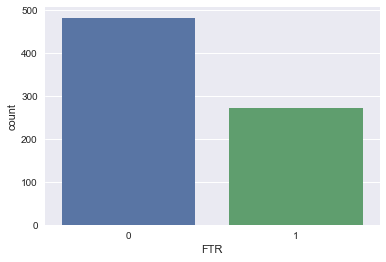

In [168]:
sns.countplot(x='FTR', data=df)

In [169]:
# Normalizando os dados com o StandardScaler
# A distribuição dos dados será transformada tal que sua média = 0 e o desvio padrão = 1
# z = (x-u)/σ
# x = dados, u = média, σ = desvio padrão
scaler = StandardScaler()
scaler.fit(df.drop(['FTR'],axis=1))
dados_normalizados = scaler.transform(df.drop(['FTR'],axis=1))
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[:-1])
df = df[['FTR']]
df = pd.concat([df, df_normalizado], axis=1, sort=False)
df.dropna(inplace=True)
df.head()

,FTR,assistances,receivedBalls,recoveredBalls,lostBalls,yellowCards,redCards,receivedCrossBalls,missedCrossBalls,receivedCrossBallsPercent,...,goodFinishes,badFinishes,finishes,goals,ownGoals,offsides,sucessfulLongPasses,unsucessfulLongPasses,sucessfulPasses,unsucessfulPasses
0,1.0,-0.168140,0.410117,1.022060,-1.159548,-1.681327,-0.396135,0.727197,1.028067,0.069262,...,1.460464,0.751466,1.233189,2.498598,0.0,-0.718523,-0.888714,-0.920240,0.380777,-0.387335
1,0.0,0.743071,-0.528759,-0.555906,0.131668,-0.242636,-0.396135,0.064435,-1.829355,3.043242,...,0.180088,1.042655,0.802171,0.690135,0.0,-0.177484,-0.888714,-0.304030,-0.541305,-0.194178
2,1.0,-0.623745,-0.340984,-1.081895,0.014285,-0.961982,-0.396135,-0.598326,0.576895,-0.879097,...,-0.246704,0.460278,0.155645,0.690135,0.0,-0.718523,-0.132957,-0.920240,-0.347182,-0.773648
3,0.0,1.198676,1.004738,0.496071,-0.103099,-0.242636,-0.396135,0.064435,0.125723,0.014018,...,-0.246704,1.042655,0.586663,-0.214097,0.0,1.445633,-0.888714,-0.304030,1.011675,1.351073
4,0.0,-1.534956,1.082978,-0.555906,1.422884,-0.961982,-0.396135,0.727197,-0.927011,1.717381,...,2.740839,0.751466,2.095224,-0.214097,0.0,-1.259561,-0.888714,0.312181,1.108736,0.288713


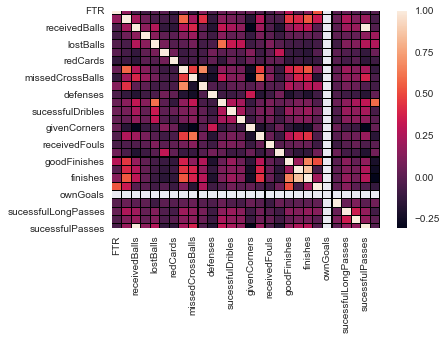

In [170]:
#Mapa de calor de correlações
sns.heatmap(df.corr(),linewidths=0.1,linecolor="black")

In [171]:
# Características
X_af = df.drop('FTR',axis=1)
# Alvo da previsão
y_af = df['FTR']

# Divisão treino/teste
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(X_af,y_af,test_size=0.3, random_state=101)

# Regressão Linear
linear_regression_af = LinearRegression()
linear_regression_af.fit(X_train_af, y_train_af)
predict_linear_regression_af = linear_regression_af.predict(X_test_af)

# Regressão Logística
logistic_regression_af = LogisticRegression()
logistic_regression_af.fit(X_train_af, y_train_af)
predict_logistic_regression_af = logistic_regression_af.predict(X_test_af)

# Árvore de Decisão
decision_tree_af = DecisionTreeClassifier()
decision_tree_af.fit(X_train_af, y_train_af)
predict_decision_tree_af = decision_tree_af.predict(X_test_af)

# Floresta Aleatória
#Método do cotovelo
error_rate = []

for i in range(1,200):
    random_forest_af = RandomForestClassifier(n_estimators=i)
    random_forest_af.fit(X_train_af, y_train_af)
    predict_random_forest_af = random_forest_af.predict(X_test_af)
    error_rate.append(np.mean(predict_random_forest_af!=y_test_af))
    
random_forest_af = RandomForestClassifier(n_estimators=error_rate.index(min(error_rate)))
random_forest_af.fit(X_train_af, y_train_af)
predict_random_forest_af = random_forest_af.predict(X_test_af)

# KNN
error_rate = []

for i in range(1,40):
    knn_af = KNeighborsClassifier(n_neighbors=i)
    knn_af.fit(X_train_af, y_train_af)
    predict_knn_af = knn_af.predict(X_test_af)
    error_rate.append(np.mean(predict_knn_af!=y_test_af))
    
knn_af = KNeighborsClassifier(n_neighbors=error_rate.index(min(error_rate)))
knn_af.fit(X_train_af, y_train_af)
predict_knn_af = knn_af.predict(X_test_af)

# SVM
param_grid = {'C':[0.1,1,10,100,1000],'gamma': [1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid_af = GridSearchCV(SVC(),param_grid,refit=True, verbose=3)
grid_af.fit(X_train_af, y_train_af)
predict_svm_af = grid_af.predict(X_test_af)

# MLP
mlp_classifier_af = MLPClassifier(hidden_layer_sizes=(2,8), activation='logistic', solver='adam', max_iter=1000)
mlp_classifier_af.fit(X_train_af,y_train_af)
predict_mlp_classifier_af = mlp_classifier_af.predict(X_test_af)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.640, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.640, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.640, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.640, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.1s finished


In [172]:
print("Antes!!")
print('\nRegressão linear: %.2f' %(linear_regression.score(X_test, y_test)*100) + "%") 
print('\nRegressão logística: %.2f' %(logistic_regression.score(X_test, y_test)*100) + "%")
print('\nÁrvore de decisão: %.2f' %(decision_tree.score(X_test, y_test)*100) + "%")
print('\nFloresta aleatória: %.2f' %(random_forest.score(X_test, y_test)*100) + "%")
print('\nKNN: %.2f' %(knn.score(X_test, y_test)*100) + "%")
print('\nSVM: %.2f' %(grid.score(X_test, y_test)*100) + "%")

print("\n\nDepois!")
print('\nRegressão linear: %.2f' %(linear_regression_af.score(X_test_af, y_test_af)*100) + "%") 
print('\nRegressão logística: %.2f' %(logistic_regression_af.score(X_test_af, y_test_af)*100) + "%")
print('\nÁrvore de decisão: %.2f' %(decision_tree_af.score(X_test_af, y_test_af)*100) + "%")
print('\nFloresta aleatória: %.2f' %(random_forest_af.score(X_test_af, y_test_af)*100) + "%")
print('\nKNN: %.2f' %(knn_af.score(X_test_af, y_test_af)*100) + "%")
print('\nSVM: %.2f' %(grid_af.score(X_test_af, y_test_af)*100) + "%")

Antes!!

Regressão linear: 21.05%

Regressão logística: 55.75%

Árvore de decisão: 52.65%

Floresta aleatória: 53.10%

KNN: 47.35%

SVM: 52.21%


Depois!

Regressão linear: 22.96%

Regressão logística: 75.22%

Árvore de decisão: 67.26%

Floresta aleatória: 72.57%

KNN: 68.14%

SVM: 72.57%
